# Import de Datos y Librerias

In [129]:
# Importamos librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargamos el DataFrame y mostramos
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectIMDB/data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Exploracion de los datos

In [3]:
# Creamos una funcion que grafique la columna recibida en relacion a el score imdb en un grafico de dispersion
def columna_vs_imdb_score(columna, dataframe = df):
    # Apariencia
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 2, 1)

    # Grafico
    sns.scatterplot(x=columna, y="imdb_score", data=dataframe)

    # Mostrar
    plt.tight_layout()
    plt.show()

In [4]:
# Creamos una funcion que grafique la suma de los elementos en la columna recibida
def columna_vs_count(columna):
    # Apariencia
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 2, 1)

    # Extraemos la suma de los valores y graficamos los primeros 30 con mas filas que lo contengan
    count = df[columna].value_counts().sort_values(ascending = False)
    sns.barplot(count.head(30))

    # Mostrar
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [5]:
# Creamos una funcion donde visualizaremos como se veria el grafico una vez procesados los datos por el algoritmo
def reducir_sesgo_preview(columna):
    # Copiamos el DataFrame original
    nuevo_df = df.copy()

    # Pasamos el algoritmo por la columna recibida
    nuevo_df[columna] = np.log(nuevo_df[columna]+1)

    # Llamamos a la funcion que lo grafica
    columna_vs_imdb_score(columna, nuevo_df)

In [6]:
# Visualizamos las columnas de el DataFrame
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
(5043, 28)


In [7]:
# Eliminamos columnas que no sirven para el analisis o no tienen una relacion con el objetivo
df.drop(columns=["movie_imdb_link", "movie_title", "facenumber_in_poster", "aspect_ratio"], axis = 1, inplace = True)

In [8]:
# Verificamos cuantos valores null hay en cada columna
valores_nulos = df.isnull().sum()
print(valores_nulos)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
plot_keywords                153
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64


## Columna "color"

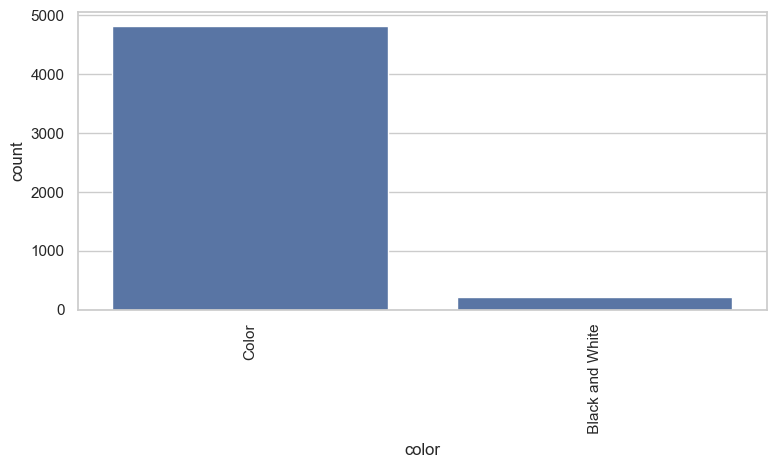

In [9]:
columna_vs_count("color")

## Columna "director_name"

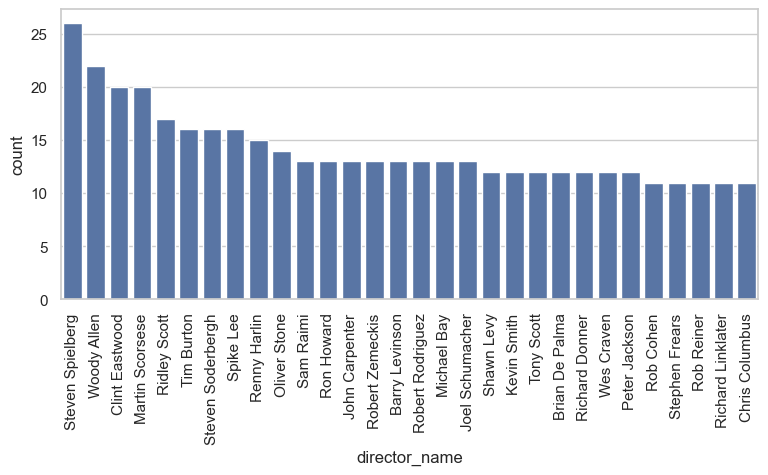

In [10]:
columna_vs_count("director_name")

## Columna "num_critic_for_reviews"

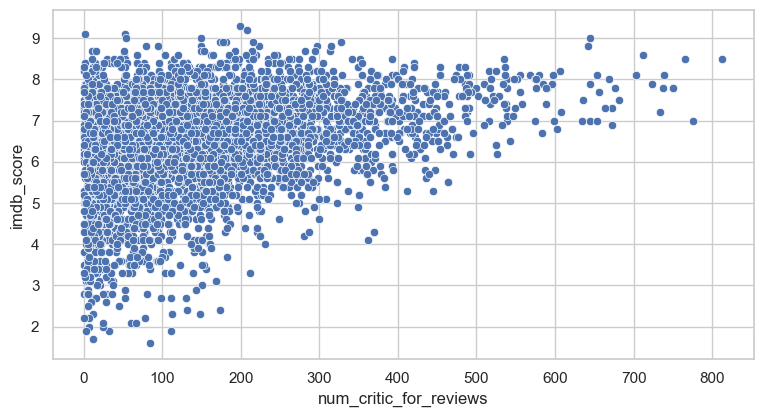

In [11]:
columna_vs_imdb_score("num_critic_for_reviews")

## Columna "duration"

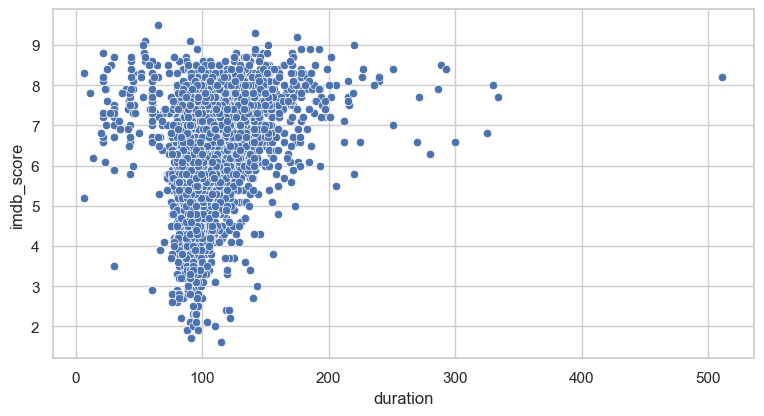

In [12]:
columna_vs_imdb_score("duration")

## Columna "director_facebook_likes"

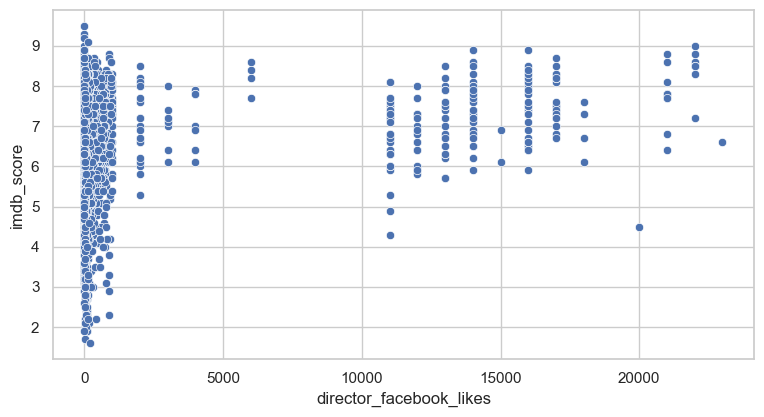

In [13]:
columna_vs_imdb_score("director_facebook_likes")

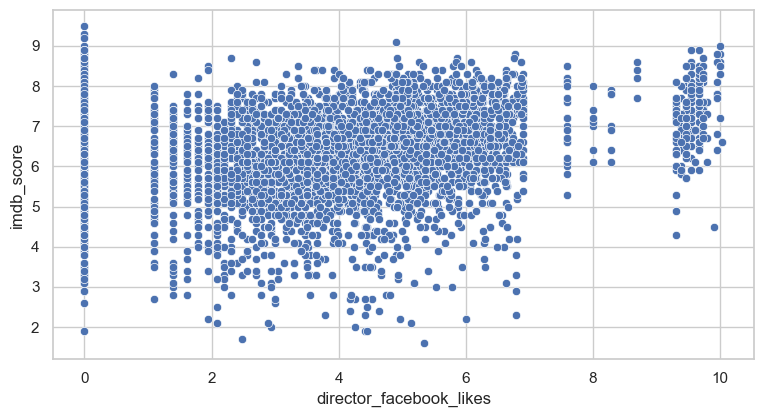

In [14]:
reducir_sesgo_preview("director_facebook_likes")

## Columna "actor_3_facebook_likes"

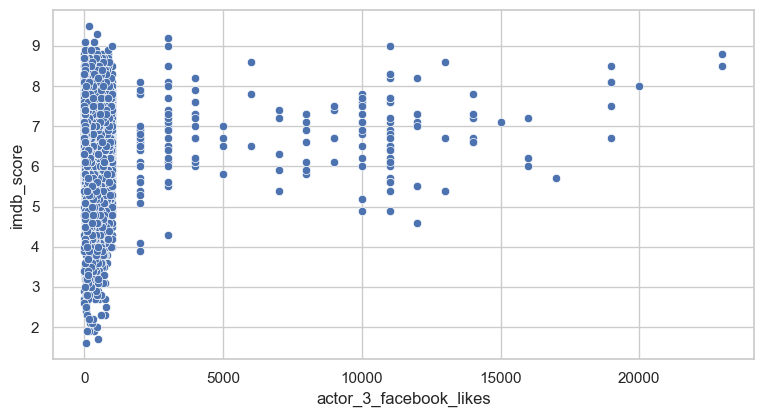

In [15]:
columna_vs_imdb_score("actor_3_facebook_likes")

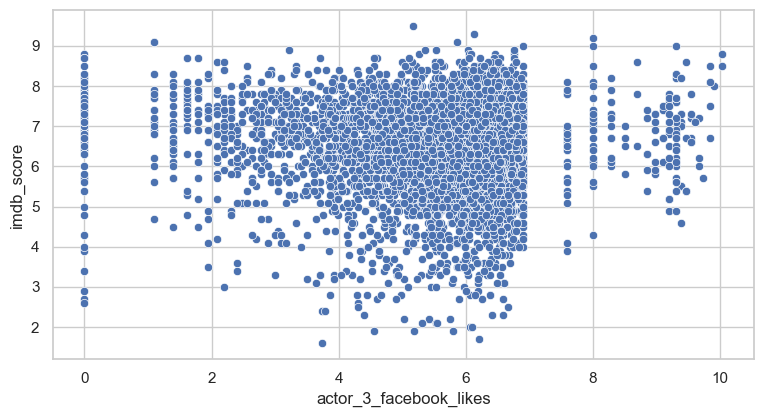

In [16]:
reducir_sesgo_preview("actor_3_facebook_likes")

## Columna "actor_1_facebook_likes"

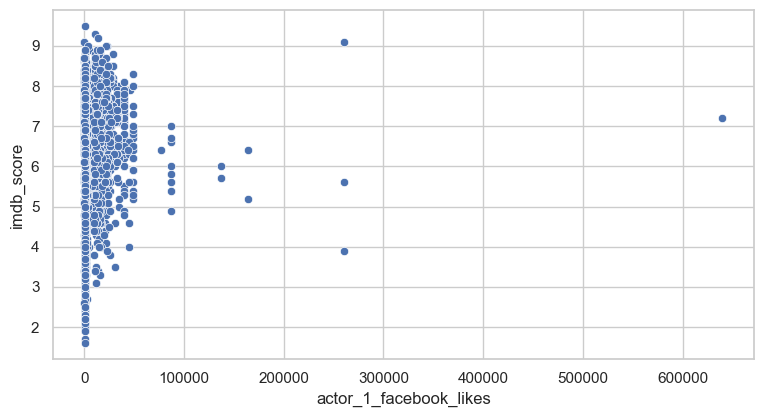

In [18]:
columna_vs_imdb_score("actor_1_facebook_likes")

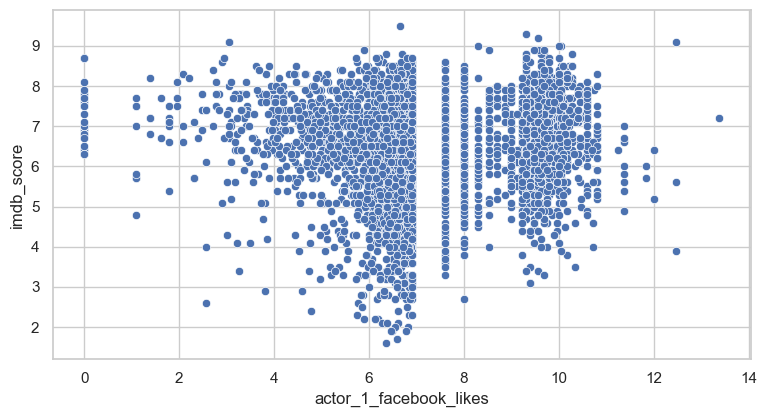

In [19]:
reducir_sesgo_preview("actor_1_facebook_likes")

## Columna "gross"

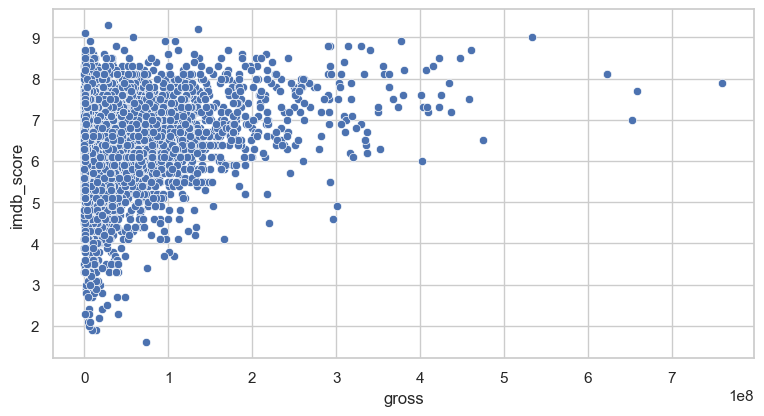

In [20]:
columna_vs_imdb_score("gross")

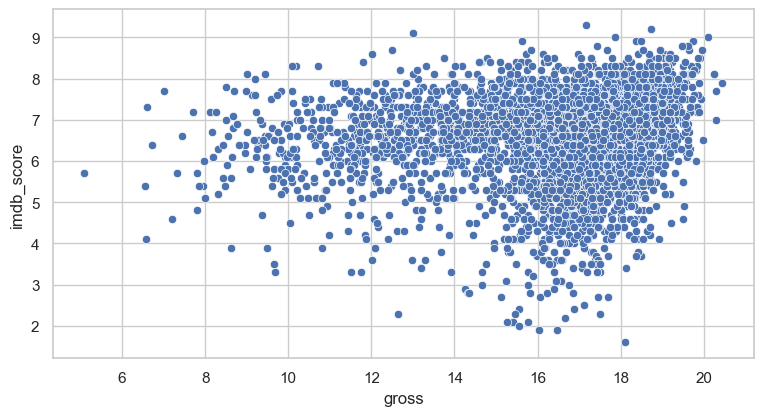

In [21]:
reducir_sesgo_preview("gross")

In [22]:
print(df["gross"].describe())
print(df["gross"].median())

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64
25517500.0


## Columna "num_voted_users"

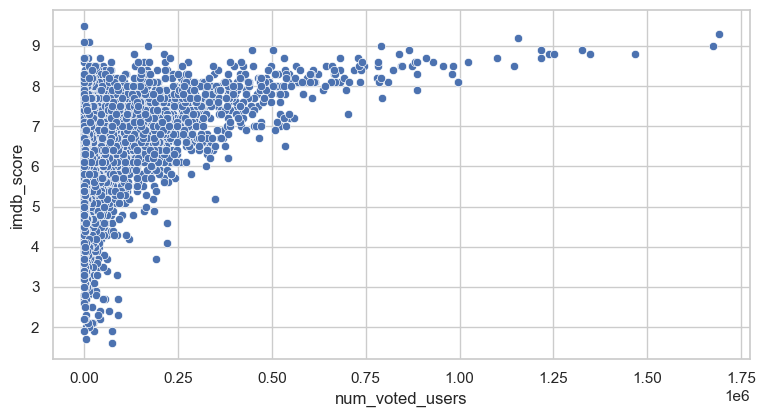

In [25]:
columna_vs_imdb_score("num_voted_users")

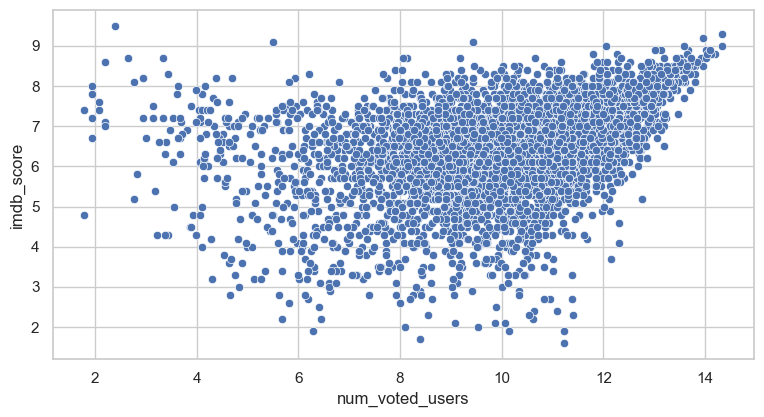

In [26]:
reducir_sesgo_preview("num_voted_users")

## Columna "cast_total_facebook_likes"

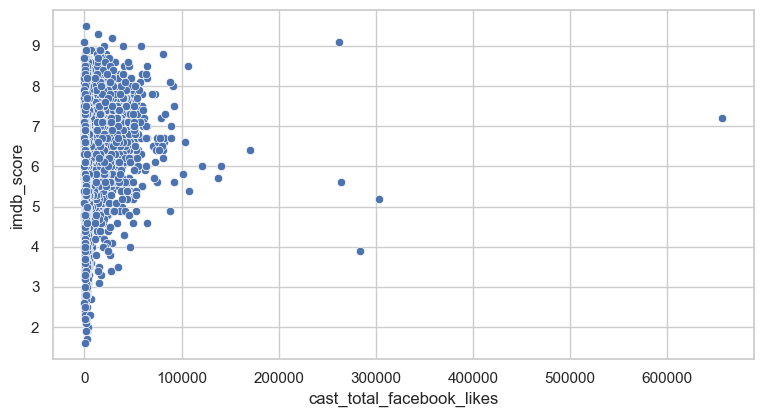

In [27]:
columna_vs_imdb_score("cast_total_facebook_likes")

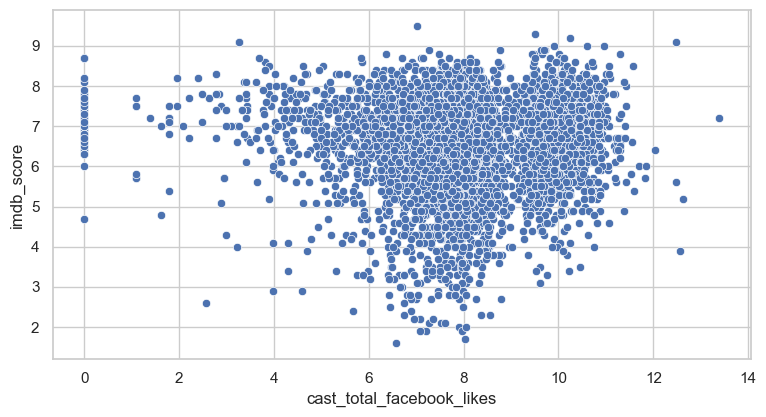

In [28]:
reducir_sesgo_preview("cast_total_facebook_likes")

## Columna "plot_keywords"

In [29]:
print(df["plot_keywords"])

0                  avatar|future|marine|native|paraplegic
1       goddess|marriage ceremony|marriage proposal|pi...
2                     bomb|espionage|sequel|spy|terrorist
3       deception|imprisonment|lawlessness|police offi...
4                                                     NaN
                              ...                        
5038               fraud|postal worker|prison|theft|trial
5039         cult|fbi|hideout|prison escape|serial killer
5040                                                  NaN
5041                                                  NaN
5042    actress name in title|crush|date|four word tit...
Name: plot_keywords, Length: 5043, dtype: object


## Columna "num_user_for_reviews"

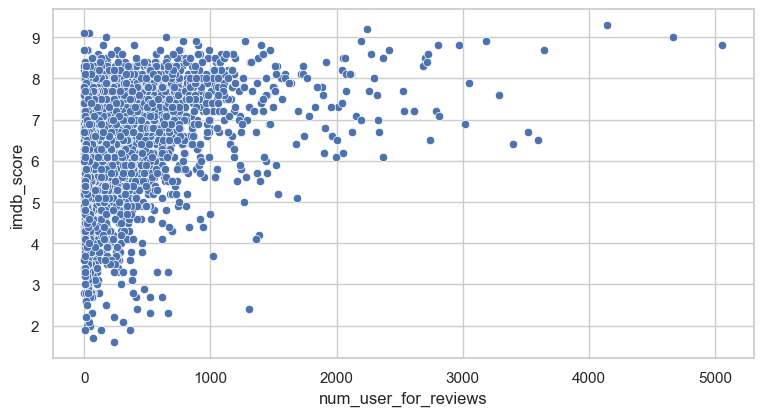

In [30]:
columna_vs_imdb_score("num_user_for_reviews")

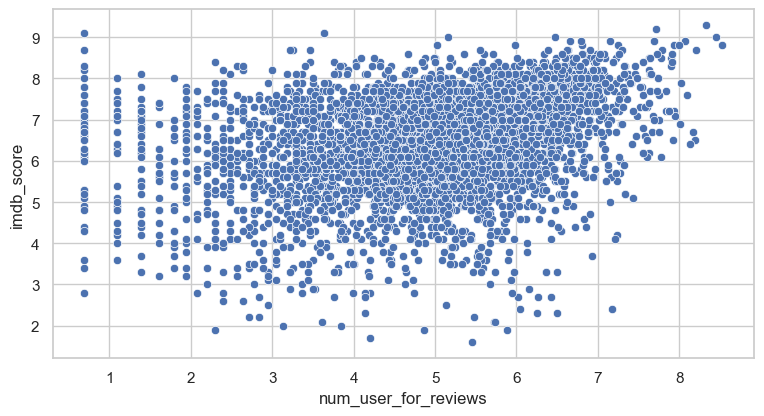

In [31]:
reducir_sesgo_preview("num_user_for_reviews")

## Columna "language"

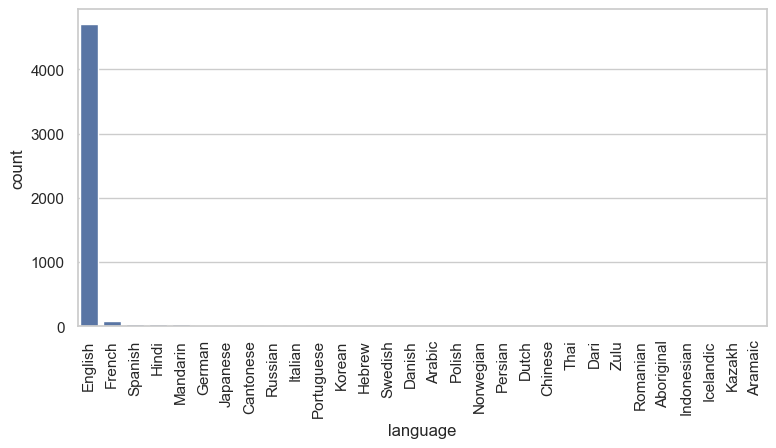

In [32]:
columna_vs_count("language")

## Columna "country"

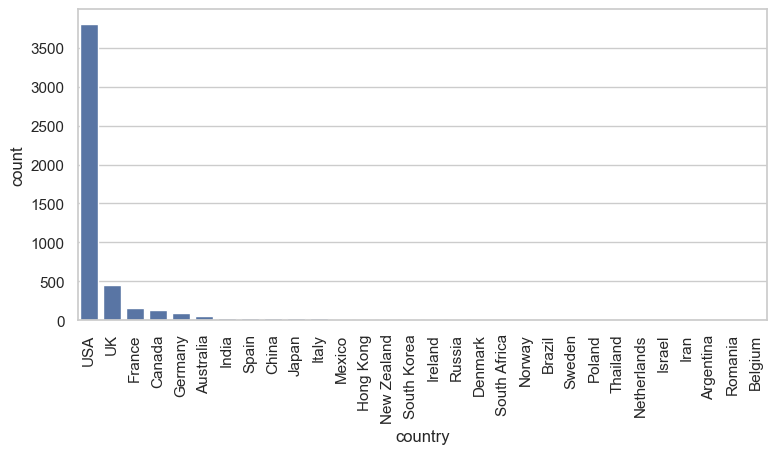

In [33]:
columna_vs_count("country")

## Columna "content_rating"

In [34]:
print(df["content_rating"])

0       PG-13
1       PG-13
2       PG-13
3       PG-13
4         NaN
        ...  
5038      NaN
5039    TV-14
5040      NaN
5041    PG-13
5042       PG
Name: content_rating, Length: 5043, dtype: object


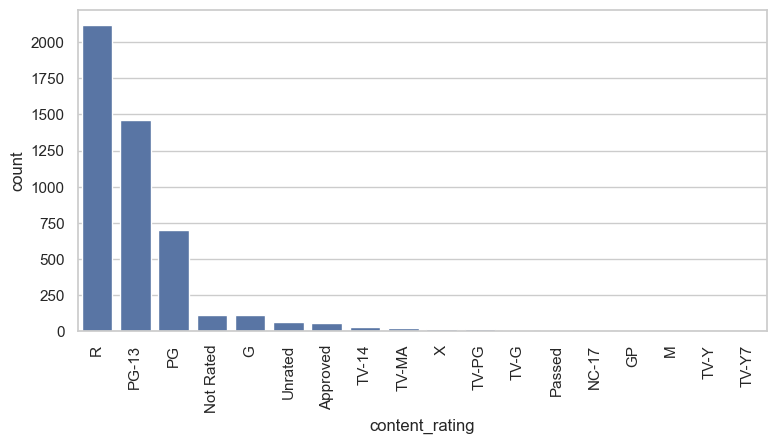

In [35]:
columna_vs_count("content_rating")

## Columna "budget"

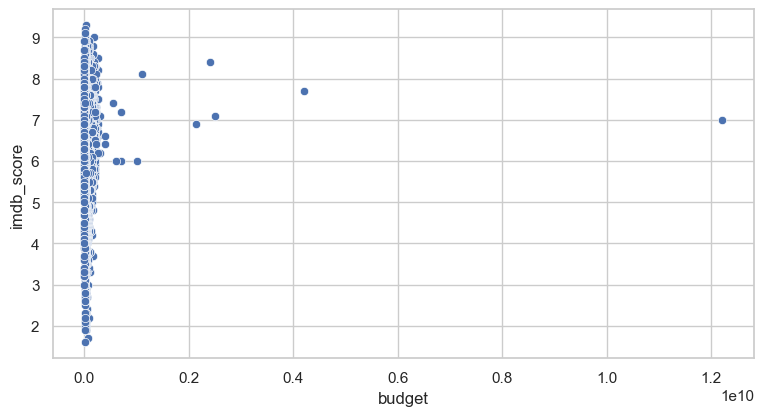

In [36]:
columna_vs_imdb_score("budget")

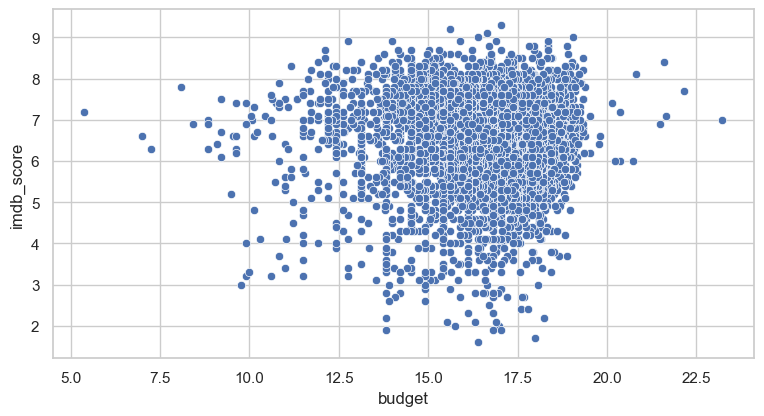

In [37]:
reducir_sesgo_preview("budget")

In [38]:
print(df["budget"].describe())
print(df["budget"].median())

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64
20000000.0


## Columna "title_year"

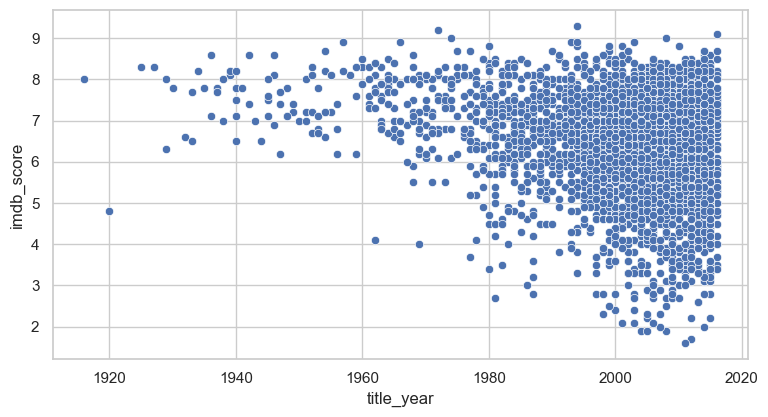

In [39]:
columna_vs_imdb_score("title_year")

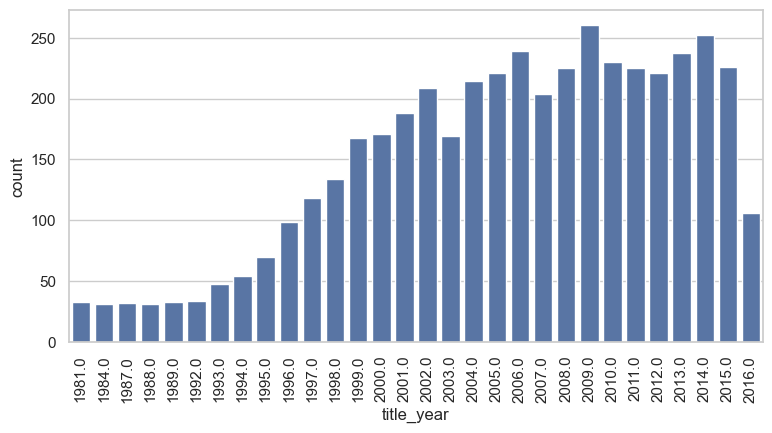

In [40]:
columna_vs_count("title_year")

## Columna "actor_2_facebook_likes"

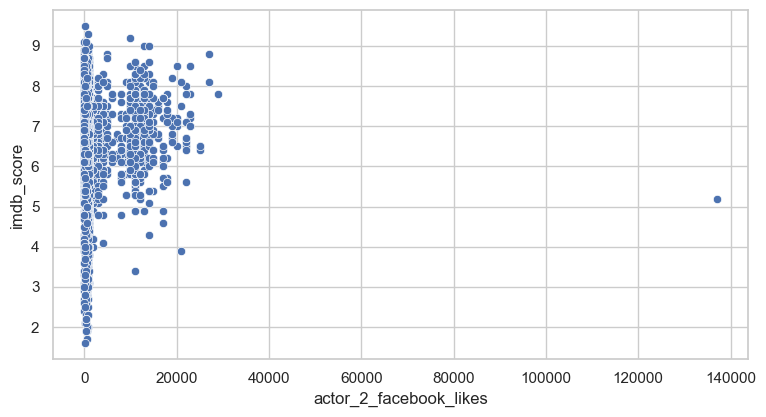

In [41]:
columna_vs_imdb_score("actor_2_facebook_likes")

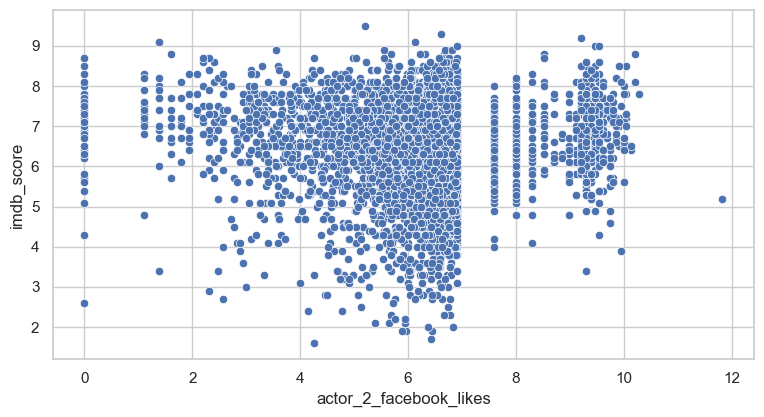

In [42]:
reducir_sesgo_preview("actor_2_facebook_likes")

## Columna "movie_facebook_likes"

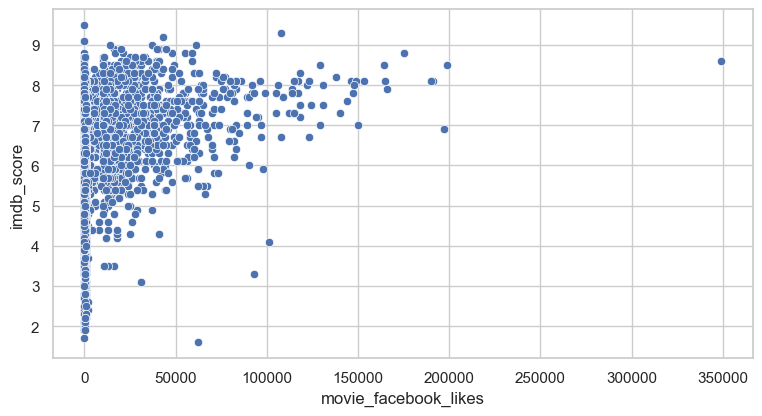

In [43]:
columna_vs_imdb_score("movie_facebook_likes")

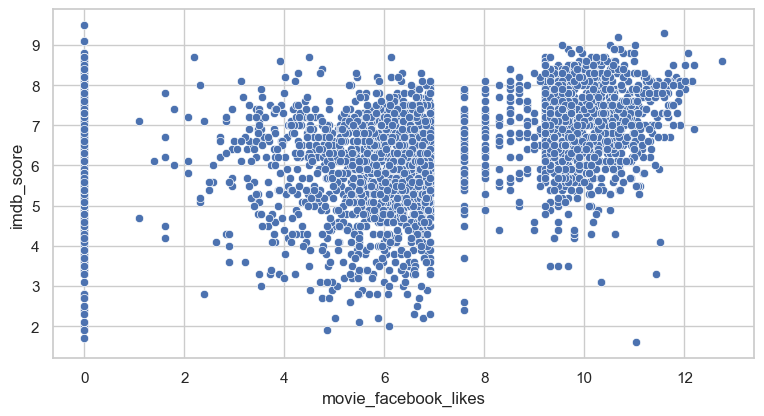

In [44]:
reducir_sesgo_preview("movie_facebook_likes")

# Manejo de Filas Vacias

In [45]:
# Eliminamos mas columnas no son relevantes ( Luego del analisis )
df.drop("color", axis = 1, inplace = True)
df.drop("plot_keywords", axis = 1, inplace = True)
df.drop("language", axis = 1, inplace = True)

# Todos los valores que no sean USA o UK se convertiran en other
country_count = df["country"].value_counts()
count = country_count[:2].index
df["country"] = df.country.where(df.country.isin(count), "other")

# Completamos las celdas de content rating nulls con R
df["content_rating"].fillna("R", inplace = True)

# Eliminamos las filas que contengan celdas vacias restantes
df.dropna(inplace=True)

In [46]:
# Verificamos nuevamente que no queden nulls
valores_nulos = df.isnull().sum()
print(valores_nulos)

(3879, 21)
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64


# Entrenamiento del modelo

## Preparacion de Datos

In [47]:
# Separamos los datos en X e Y y mostramos que tipo de datos contienen las columnas
Y = df["imdb_score"]
X = df.drop(columns=["imdb_score"])
print(X.dtypes)

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
num_user_for_reviews         float64
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
movie_facebook_likes           int64
dtype: object


In [48]:
# Extraemos las columnas que tengan almacenados datos de tipo object (Texto)
toInt = ["director_name", "actor_2_name", "genres", "actor_1_name", "actor_3_name", "country", "content_rating"]
Label_Encoder = LabelEncoder()

# Convertimos las columnas que contienen texto en numeros
for column in toInt:
    X[column] = Label_Encoder.fit_transform(X[column])

In [49]:
# Mostramos las columnas de X
print(X.columns)

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes'],
      dtype='object')


In [50]:
# Columnas de X
columnas = ['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes']

# Pasamos todo el dataframe (X) por el algoritmo para normalizar los datos y reducir el sesgo
for column in columnas:
    X[column] = np.log(X[column]+1)

In [51]:
# Separamos los datos entre datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [152]:
# Creamos una funcion que grafica e imprime los resultados de los modelos entrenados
def model_performance(model, y_pred):
    # Calculo del MSE
    mse = mean_squared_error(y_test, y_pred)
    print("Error Cuadrático Medio (MSE):", mse)

    # Calculo del RMSE
    rmse = np.sqrt(mse)
    print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

    # Calculo del R2
    r2 = r2_score(y_test, y_pred)
    print("Coeficiente de Determinación (R2):", r2)

    # Calculo del MAE
    mae = mean_absolute_error(y_test, y_pred)
    print("Error Absoluto Medio (MAE):", mae)

    # Calculo del MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print("Error Porcentual Absoluto Medio (MAPE):", mape)

    # Graficamos los resultados del modelo
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.title(f"Gráfico de Dispersión con {model}")
    plt.grid(visible = True)
    plt.show()

## Linear Regression

In [108]:
# Creamos el modelo y entrenamos
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

Error Cuadrático Medio (MSE): 0.6294699321984363
Raíz del Error Cuadrático Medio (RMSE): 0.793391411724652
Coeficiente de Determinación (R2): 0.4415241049654709
Error Absoluto Medio (MAE): 0.601263312902157
Error Porcentual Absoluto Medio (MAPE): 10.454451157918381


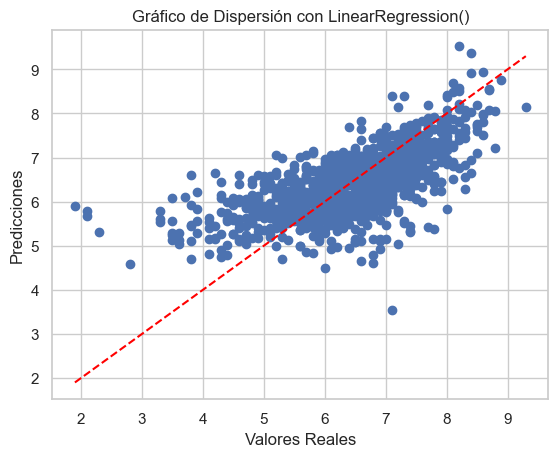

In [154]:
# Hacemos las predicciones y vemos resultados
LR_predictions = LR.predict(X_test)
model_performance(LR, LR_predictions)

## Random Forest Regression

In [150]:
# Creamos el modelo y entrenamos
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

Error Cuadrático Medio (MSE): 0.48371366752577344
Raíz del Error Cuadrático Medio (RMSE): 0.6954952677953844
Coeficiente de Determinación (R2): 0.5708414181620826
Error Absoluto Medio (MAE): 0.5079269759450172
Error Porcentual Absoluto Medio (MAPE): 9.029523668546915


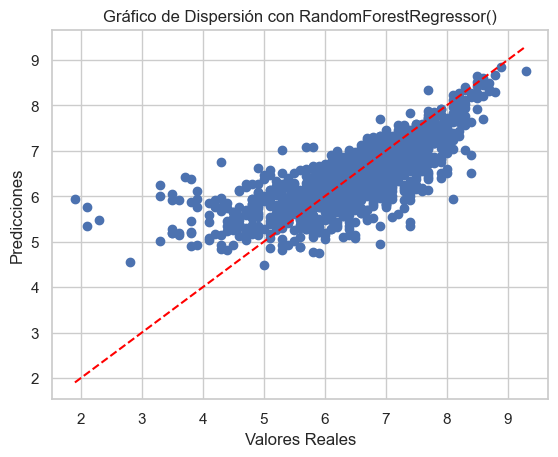

In [155]:
# Hacemos las predicciones y vemos resultados
RFR_predictions = RFR.predict(X_test)
model_performance(RFR, RFR_predictions)

## Support Vector Regression

In [78]:
# Escalamos los datos de prueba para el modelo SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [144]:
# Creamos el modelo
SVR = SVR(kernel='rbf', C = 2 )
SVR.fit(X_train_scaled, y_train)

SVR(C=2)

Error Cuadrático Medio (MSE): 0.48490141082142224
Raíz del Error Cuadrático Medio (RMSE): 0.6963486273566009
Coeficiente de Determinación (R2): 0.569787633118225
Error Absoluto Medio (MAE): 0.5039693605401456
Error Porcentual Absoluto Medio (MAPE): 9.062451285114827


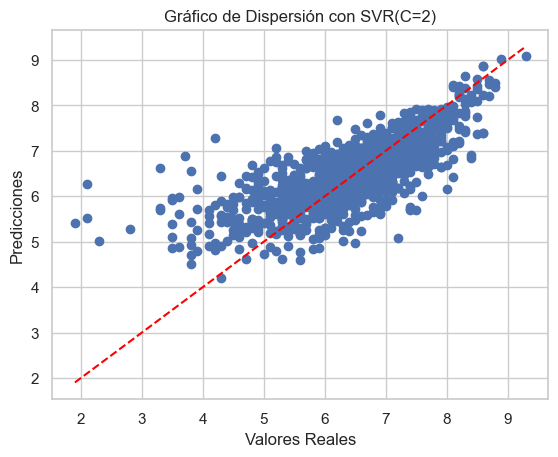

In [156]:
# Hacemos las predicciones y vemos resultados
SVR_predictions = SVR.predict(X_test_scaled)
model_performance(SVR, SVR_predictions)

## Ridge

In [131]:
# Creamos el modelo
R = Ridge(alpha=0.1)
R.fit(X_train, y_train)

Ridge(alpha=0.1)

Error Cuadrático Medio (MSE): 0.6334219817418407
Raíz del Error Cuadrático Medio (RMSE): 0.7958781199039465
Coeficiente de Determinación (R2): 0.4380177827520092
Error Absoluto Medio (MAE): 0.6035193487954429
Error Porcentual Absoluto Medio (MAPE): 10.50380823463771


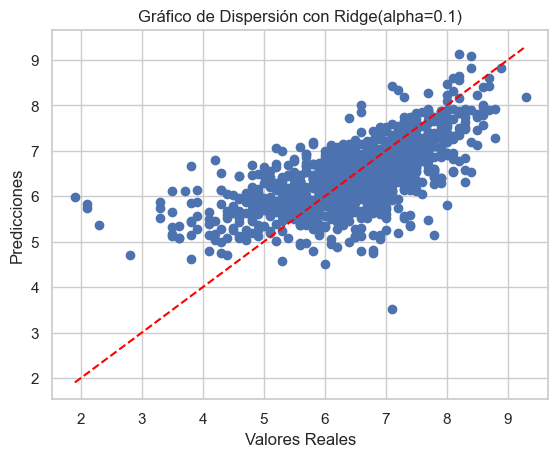

In [157]:
# Hacemos las predicciones y vemos resultados
R_predictions = R.predict(X_test)
model_performance(R, R_predictions)

## Ensamble

In [158]:
ensemble_predictions = (LR_predictions + RFR_predictions + SVR_predictions + R_predictions) / 4

Error Cuadrático Medio (MSE): 0.5002970736504311
Raíz del Error Cuadrático Medio (RMSE): 0.7073168127864847
Coeficiente de Determinación (R2): 0.556128352288001
Error Absoluto Medio (MAE): 0.5249624295732604
Error Porcentual Absoluto Medio (MAPE): 9.318465216721645


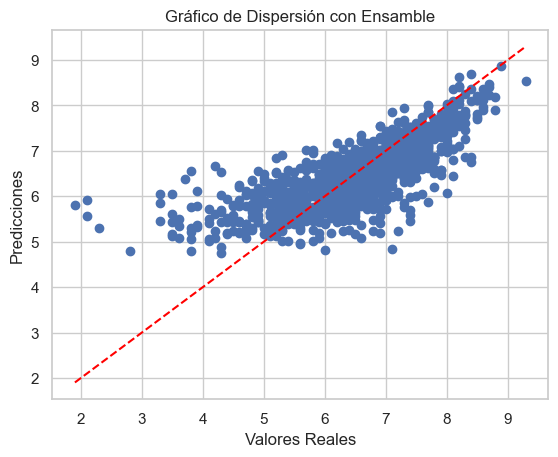

In [159]:
model_performance("Ensamble", ensemble_predictions)